# DAML - BSU Skills Bootcamp 2025
## Problem statement:
### Are there identifiable features of students’ citation practices that we can use as insights for our teaching?

## Most reliable version of python to run this notebook is _3.9_

## AI ethics declaration

I have used co-pilot for VS code which is a paid for service that appear to be getting free from Github.  My policy for co-pilot is to use for only one purpose - syntax fixing. I have attempted to write the code myself first of all and then fix errors rather than generate code. If there are iterations such as writing a statement for differetn lists/dictionaries then I have let co-pilot autocomplete for me.  Embedded in various cells are test data structures that I use to make sure I understand everything that co-pilot has generated for me. I have not used co-pilot for any design work.

## ETL
### Extraction
    - Two undergraduate dissertation part 1 submissions. Excellent from 2023-24 and a upper mid-range from 2024-25.
    - References transformed into JSON using _anystyle.io_
        - TODO: create function that runs local Ruby script for _anystyle.io_ to allow batch processing of multiple scripts.
### Transform JSON into VOSViewer format
#### Lookup paperid as <<PK>> from _semanticscholar_ API  



In [ ]:
# Let's see what the json output from anystyle.io looks like
# %pip install pandas
import pandas as pd

maddie_df=pd.read_json('training2023_citations.json') # excellent paper (90%)


test_df=pd.read_json('training2_citations.json') # average-good paper (65%)

maddie_df.head(10)

# cleanup author field

#newdf = df.drop_duplicates()
#newdf.head(100)

# TODO:
# if I wanted to use author field (not the case in this project) then it needs splitting into first and last name for each author


You should consider upgrading via the 'c:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


,author,title,note,language,type,issued,URL,editor,container-title,volume,publisher,page,issue,publisher-place,DOI,citation-number,edition,genre
0,"[{'family': 'Akbar', 'given': 'A.'}]",Diversity in publishing - still hideously midd...,Available at:,en,None,{'date-parts': [[2017]]},https://www.theguardian.com/books/2017/dec/09/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[{'family': 'Allen', 'given': 'A.'}]","'Third Generation Critical Theory: Benhabib, F...",NaN,en,chapter,{'date-parts': [[2010]]},NaN,"[{'family': 'Schrift', 'given': 'A.D.'}]",The History of Continental Philosophy,7.0,After Poststructuralism,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[{'literal': '-'}],Transitions and Transformations,NaN,en,book,NaN,NaN,NaN,NaN,NaN,Acumen and Chicago University Press,129– 148,NaN,NaN,NaN,NaN,NaN,NaN
3,"[{'family': 'News', 'given': 'American Library...","'""Julian is a Mermaid"" and ""Hurricane Child"" w...",28 January [Press release]. Available at:,en,None,{'date-parts': [[2019]]},https://www.ala.org/news/press-releases/2019/0...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[{'family': 'Anderson', 'given': 'P.'}]",Children's Books and Creators of Color: BookTr...,Available at:,en,None,{'date-parts': [[2022]]},https://publishingperspectives.com/2022/12/aut...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"[{'family': 'Bishop', 'given': 'R.S.'}]","'Mirrors, Windows and Sliding Glass Doors'",Available at:,en,article-journal,{'date-parts': [[1990]]},https://scenicregional.org/wp-,NaN,Perspectives: Choosing and Using Books for the...,6.0,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN
6,"[{'family': 'Blair', 'given': 'A.'}]",The True Feminists Were Hidden in Plain Sight:...,NaN,en,None,{'date-parts': [[2021]]},NaN,NaN,NaN,NaN,NaN,NaN,NaN,BA. Northern Illinois,NaN,NaN,NaN,NaN
7,NaN,NaN,University. Available at:,en,None,NaN,https://huskiecommons.lib.niu.edu/studentengag...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,[{'given': 'BookTrust'}],NaN,Julian is a Mermaid. Available at:,en,None,{'date-parts': [[2023]]},https://www.booktrust.org.uk/book/j/julian-is-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"[{'family': 'Braidotti', 'given': 'R.'}]",'A Theoretical Framework for the Critical Post...,Available at:,en,article-journal,{'date-parts': [[2019]]},https://doi.org/10.1177/0263276418771486,NaN,"Theory, Culture & Society",36.0,NaN,31–61,6,NaN,10.1177/0263276418771486,NaN,NaN,NaN


In [2]:
test_df.head(10) # inspect the first 10 rows of average paper

,author,title,publisher,volume,language,type,issued,page,publisher-place,editor,note,container-title,issue,URL,DOI,edition
0,"[{'given': 'Alverson'}, {'given': 'Sandberg'},...",Research Methods in Education,Routledge,9 and 10,en,book,{'date-parts': [[2011]]},195 – 216,London,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[{'given': 'Atkinson'}],Language Codes and Classroom Practice,NaN,13,en,article-journal,{'date-parts': [[1985]]},237–247,NaN,"[{'family': 'Edwards', 'given': 'A.D.'}]",Available at:,Oxford Review of Education,3.0,https://doi.org/10.1080/0305498870130301,10.1080/0305498870130301,NaN
2,"[{'family': 'Bernstein', 'given': 'B.'}]",'Elaborated and Restricted Codes: Their Social...,The Ethnography of Communication,"66(6, Part 2",en,article-journal,{'date-parts': [[1964]]},55–69,NaN,NaN,Available at:,American Anthropologist,NaN,https://www.jstor.org/stable/668161,NaN,NaN
3,"[{'family': 'Bernstein', 'given': 'B.'}]",'Elaborated and Restricted Codes: Their Social...,The Ethnography of Communication,"66(6, Part 2",en,article-journal,{'date-parts': [[1964]]},55–69,NaN,NaN,Available at:,American Anthropologist,NaN,https://www.jstor.org/stable/668161,NaN,NaN
4,"[{'given': 'Bogdan'}, {'given': 'Biklen'}, {'f...",'Research paradigms: Theory and practice.',NaN,5,en,article-journal,{'date-parts': [[1998]]},NaN,NaN,NaN,Online] Available from:,Research on Humanities and Social Sciences,5.0,http://www.iiste.org,NaN,NaN
5,"[{'family': 'Booth', 'given': 'A.'}, {'family'...",Systematic Approaches to a Successful Literatu...,SAGE Publications Ltd,NaN,en,book,{'date-parts': [[2021]]},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3rd
6,[{'given': 'Bourdieu'}],Cultural Theory,An Anthology Wiley & Sons,NaN,en,None,{'date-parts': [[1986]]},NaN,NaN,"[{'family': 'Szeman', 'given': 'I.'}, {'family...",Available at:,NaN,NaN,https://books.google.co.uk/books?id=O5uGEAAAQB...,NaN,NaN
7,[{'given': 'Bourdieu'}],Cultural Theory,An Anthology Wiley & Sons,NaN,en,None,{'date-parts': [[1986]]},NaN,NaN,"[{'family': 'Szeman', 'given': 'I.'}, {'family...",Available at:,NaN,NaN,https://books.google.co.uk/books?id=O5uGEAAAQB...,NaN,NaN
8,"[{'given': 'Brymann'}, {'family': 'Tubey', 'gi...",'Research paradigms: Theory and practice.',NaN,5,en,article-journal,{'date-parts': [[2001]]},NaN,NaN,NaN,Online] Available from:,Research on Humanities and Social Sciences,5.0,http://www.iiste.org,NaN,NaN
9,"[{'family': 'Cohen', 'given': 'Manion'}, {'giv...",'Research paradigms: Theory and practice.',NaN,5,en,article-journal,{'date-parts': [[2000]]},NaN,NaN,NaN,Online] Available from:,Research on Humanities and Social Sciences,5.0,http://www.iiste.org,NaN,NaN


In [3]:
test_df.count() # get some stats on the average paper

author             31
title              31
publisher          11
volume             23
language           31
type               28
issued             31
page               15
publisher-place     4
editor              3
note               24
container-title    23
issue              20
URL                19
DOI                 4
edition             3
dtype: int64

In [4]:
# Let's solve the problem of missing DOIs

maddie_df = maddie_df.dropna(subset=['DOI'])
test_df = test_df.dropna(subset=['DOI'])

# legacy code from when I was moving too soon to get unique paperId from API
'''def get_paper_id(title):
	url = f'https://api.openalex.org/works?search={title}'
	response = requests.get(url)
	if response.status_code == 200:
		data = response.json()
		if 'data' in data and data['data']:
			return data['data'][0]['id']
	return None'''

maddie_df.head(100) #  of her 91 references only 22 have DOIs. For the purposes of this project less is more since it should give a nice clean signal.

,author,title,note,language,type,issued,URL,editor,container-title,volume,publisher,page,issue,publisher-place,DOI,citation-number,edition,genre
9,"[{'family': 'Braidotti', 'given': 'R.'}]",'A Theoretical Framework for the Critical Post...,Available at:,en,article-journal,{'date-parts': [[2019]]},https://doi.org/10.1177/0263276418771486,NaN,"Theory, Culture & Society",36.0,NaN,31–61,6,NaN,10.1177/0263276418771486,NaN,NaN,NaN
13,"[{'family': 'Casey', 'given': 'K.'}, {'family'...",Sixty years of gender representation in childr...,Available at:,en,article-journal,{'date-parts': [[2021]]},https://doi.org/10.1371/journal.pone.0260566,NaN,PLoS ONE,16.0,NaN,NaN,12,NaN,10.1371/journal.pone.0260566,NaN,NaN,NaN
21,"[{'family': 'Coletta', 'given': 'J.'}]",'The Missing B Word: Compulsory Binarization a...,Available at:,en,article-journal,{'date-parts': [[2018]]},https://doi.org/10.1353/jeu.2018.0004,NaN,"Jeunesse: Young People, Texts, Cultures",10.0,NaN,85–108,1,NaN,10.1353/jeu.2018.0004,NaN,NaN,NaN
29,"[{'family': 'Bruijn. Y.', 'particle': 'De'}, {...",Ethnic diversity in Children’s books in the Ne...,Available at:,en,article-journal,{'date-parts': [[2021]]},NaN,NaN,Early Childhood Education Journal,49.0,NaN,413–423,3,NaN,10.1007/s10643-020-01080-2,NaN,NaN,NaN
36,"[{'family': 'Golafshani', 'given': 'N.'}]",'Understanding Reliability and Validity in Qua...,Available at:,en,article-journal,{'date-parts': [[2003]]},https://doi.org/10.46743/2160-,NaN,The Qualitative Report,8.0,NaN,597–606,4,NaN,10.46743/2160-,NaN,NaN,NaN
37,"[{'family': 'Gomez-Najarro', 'given': 'J.'}]",Children’s Intersecting Identities Matter: Bey...,Available at:,en,article-journal,{'date-parts': [[2020]]},https://doi.org/10.1007/s10583-019-09390-9,NaN,Children’s Literature in Education,51.0,NaN,392–410,3,NaN,10.1007/s10583-019-09390-9,NaN,NaN,NaN
40,NaN,NaN,Available at:,en,None,NaN,https://doi.org/10.1080/17405904.2017.1421243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.1080/17405904.2017.1421243,186-203.,NaN,NaN
41,"[{'family': 'Hayden', 'given': 'H.E.'}, {'fami...",'Disrupting ableism: Strengths-based represent...,Available at:,en,article-journal,{'date-parts': [[2023]]},https://doi.org/10.1177/146879842091751,NaN,Journal of Early Childhood Literacy,23.0,NaN,236–261,2,NaN,10.1177/146879842091751,NaN,NaN,NaN
43,NaN,NaN,Available at:,en,None,NaN,https://doi.org/10.1080/19361653.2020.1779164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.1080/19361653.2020.1779164,216.,NaN,NaN
44,"[{'family': 'Heinecken', 'given': 'D.'}]",Contesting Controlling Images: The Black Balle...,Available at:,en,article-journal,{'date-parts': [[2019]]},NaN,NaN,Children’s Literature in Education,50.0,NaN,297–314,3,NaN,10.1007/s10583-018-9345-y,NaN,NaN,NaN


In [5]:
import requests

# Function to get paperId based on title from OpenAlex API. Future work could match on more fields to get a more accurate match. 
def get_paper_id(title):
	url = f'https://api.openalex.org/works?search={title}'
	response = requests.get(url)
	if response.status_code == 200: # valid response unlike 404
		data = response.json()
		if 'results' in data and data['results']:
			return data['results'][0]['id']
	return None

# Add id to each row in maddie_df. Lot of co-pilot help for this one but I own the clean code as a result of my own intentions.
maddie_df['id'] = maddie_df['title'].apply(lambda x: get_paper_id(x) if pd.notnull(x) else None)
test_df['id'] = test_df['title'].apply(lambda x: get_paper_id(x) if pd.notnull(x) else None)

# remove blank id rows
#maddie_df = maddie_df.dropna(subset=['id'])

maddie_df.head(91)


,author,title,note,language,type,issued,URL,editor,container-title,volume,publisher,page,issue,publisher-place,DOI,citation-number,edition,genre,id
9,"[{'family': 'Braidotti', 'given': 'R.'}]",'A Theoretical Framework for the Critical Post...,Available at:,en,article-journal,{'date-parts': [[2019]]},https://doi.org/10.1177/0263276418771486,NaN,"Theory, Culture & Society",36.0,NaN,31–61,6,NaN,10.1177/0263276418771486,NaN,NaN,NaN,https://openalex.org/W2802076461
13,"[{'family': 'Casey', 'given': 'K.'}, {'family'...",Sixty years of gender representation in childr...,Available at:,en,article-journal,{'date-parts': [[2021]]},https://doi.org/10.1371/journal.pone.0260566,NaN,PLoS ONE,16.0,NaN,NaN,12,NaN,10.1371/journal.pone.0260566,NaN,NaN,NaN,https://openalex.org/W4200343821
21,"[{'family': 'Coletta', 'given': 'J.'}]",'The Missing B Word: Compulsory Binarization a...,Available at:,en,article-journal,{'date-parts': [[2018]]},https://doi.org/10.1353/jeu.2018.0004,NaN,"Jeunesse: Young People, Texts, Cultures",10.0,NaN,85–108,1,NaN,10.1353/jeu.2018.0004,NaN,NaN,NaN,https://openalex.org/W2888620450
29,"[{'family': 'Bruijn. Y.', 'particle': 'De'}, {...",Ethnic diversity in Children’s books in the Ne...,Available at:,en,article-journal,{'date-parts': [[2021]]},NaN,NaN,Early Childhood Education Journal,49.0,NaN,413–423,3,NaN,10.1007/s10643-020-01080-2,NaN,NaN,NaN,https://openalex.org/W3043247933
36,"[{'family': 'Golafshani', 'given': 'N.'}]",'Understanding Reliability and Validity in Qua...,Available at:,en,article-journal,{'date-parts': [[2003]]},https://doi.org/10.46743/2160-,NaN,The Qualitative Report,8.0,NaN,597–606,4,NaN,10.46743/2160-,NaN,NaN,NaN,https://openalex.org/W2113537253
37,"[{'family': 'Gomez-Najarro', 'given': 'J.'}]",Children’s Intersecting Identities Matter: Bey...,Available at:,en,article-journal,{'date-parts': [[2020]]},https://doi.org/10.1007/s10583-019-09390-9,NaN,Children’s Literature in Education,51.0,NaN,392–410,3,NaN,10.1007/s10583-019-09390-9,NaN,NaN,NaN,https://openalex.org/W2950850620
40,NaN,NaN,Available at:,en,None,NaN,https://doi.org/10.1080/17405904.2017.1421243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.1080/17405904.2017.1421243,186-203.,NaN,NaN,None
41,"[{'family': 'Hayden', 'given': 'H.E.'}, {'fami...",'Disrupting ableism: Strengths-based represent...,Available at:,en,article-journal,{'date-parts': [[2023]]},https://doi.org/10.1177/146879842091751,NaN,Journal of Early Childhood Literacy,23.0,NaN,236–261,2,NaN,10.1177/146879842091751,NaN,NaN,NaN,https://openalex.org/W2732730595
43,NaN,NaN,Available at:,en,None,NaN,https://doi.org/10.1080/19361653.2020.1779164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.1080/19361653.2020.1779164,216.,NaN,NaN,None
44,"[{'family': 'Heinecken', 'given': 'D.'}]",Contesting Controlling Images: The Black Balle...,Available at:,en,article-journal,{'date-parts': [[2019]]},NaN,NaN,Children’s Literature in Education,50.0,NaN,297–314,3,NaN,10.1007/s10583-018-9345-y,NaN,NaN,NaN,https://openalex.org/W2791565878


In [6]:
test_df.head(100)

,author,title,publisher,volume,language,type,issued,page,publisher-place,editor,note,container-title,issue,URL,DOI,edition,id
1,[{'given': 'Atkinson'}],Language Codes and Classroom Practice,NaN,13,en,article-journal,{'date-parts': [[1985]]},237–247,NaN,"[{'family': 'Edwards', 'given': 'A.D.'}]",Available at:,Oxford Review of Education,3.0,https://doi.org/10.1080/0305498870130301,10.1080/0305498870130301,NaN,https://openalex.org/W2090460135
11,"[{'family': 'Edwards', 'given': 'A.D.'}]",Language Codes and Classroom Practice,NaN,13,en,article-journal,{'date-parts': [[1987]]},237–247,NaN,NaN,Available at:,Oxford Review of Education,3.0,https://doi.org/10.1080/0305498870130301,10.1080/0305498870130301,NaN,https://openalex.org/W2090460135
12,"[{'family': 'Edwards', 'given': 'A.D.'}]",Language Codes and Classroom Practice,NaN,13,en,article-journal,{'date-parts': [[1987]]},237–247,NaN,NaN,Available at:,Oxford Review of Education,3.0,https://doi.org/10.1080/0305498870130301,10.1080/0305498870130301,NaN,https://openalex.org/W2090460135
13,"[{'family': 'Ertmer', 'given': 'P.A.'}, {'fami...","Behaviorism, Cognitivism, Constructivism: Comp...",NaN,26,en,article-journal,{'date-parts': [[2013]]},43–71,NaN,NaN,NaN,Performance Improvement Quarterly,2.0,NaN,10.1002/piq.21143.,NaN,https://openalex.org/W2136881575


In [7]:
#remove the 'https://openalex.org/' from the id field
maddie_df['id'] = maddie_df['id'].apply(lambda x: x.split('/')[-1] if x is not None else None)
test_df['id'] = test_df['id'].apply(lambda x: x.split('/')[-1] if x is not None else None)

maddie_df.head(91)

,author,title,note,language,type,issued,URL,editor,container-title,volume,publisher,page,issue,publisher-place,DOI,citation-number,edition,genre,id
9,"[{'family': 'Braidotti', 'given': 'R.'}]",'A Theoretical Framework for the Critical Post...,Available at:,en,article-journal,{'date-parts': [[2019]]},https://doi.org/10.1177/0263276418771486,NaN,"Theory, Culture & Society",36.0,NaN,31–61,6,NaN,10.1177/0263276418771486,NaN,NaN,NaN,W2802076461
13,"[{'family': 'Casey', 'given': 'K.'}, {'family'...",Sixty years of gender representation in childr...,Available at:,en,article-journal,{'date-parts': [[2021]]},https://doi.org/10.1371/journal.pone.0260566,NaN,PLoS ONE,16.0,NaN,NaN,12,NaN,10.1371/journal.pone.0260566,NaN,NaN,NaN,W4200343821
21,"[{'family': 'Coletta', 'given': 'J.'}]",'The Missing B Word: Compulsory Binarization a...,Available at:,en,article-journal,{'date-parts': [[2018]]},https://doi.org/10.1353/jeu.2018.0004,NaN,"Jeunesse: Young People, Texts, Cultures",10.0,NaN,85–108,1,NaN,10.1353/jeu.2018.0004,NaN,NaN,NaN,W2888620450
29,"[{'family': 'Bruijn. Y.', 'particle': 'De'}, {...",Ethnic diversity in Children’s books in the Ne...,Available at:,en,article-journal,{'date-parts': [[2021]]},NaN,NaN,Early Childhood Education Journal,49.0,NaN,413–423,3,NaN,10.1007/s10643-020-01080-2,NaN,NaN,NaN,W3043247933
36,"[{'family': 'Golafshani', 'given': 'N.'}]",'Understanding Reliability and Validity in Qua...,Available at:,en,article-journal,{'date-parts': [[2003]]},https://doi.org/10.46743/2160-,NaN,The Qualitative Report,8.0,NaN,597–606,4,NaN,10.46743/2160-,NaN,NaN,NaN,W2113537253
37,"[{'family': 'Gomez-Najarro', 'given': 'J.'}]",Children’s Intersecting Identities Matter: Bey...,Available at:,en,article-journal,{'date-parts': [[2020]]},https://doi.org/10.1007/s10583-019-09390-9,NaN,Children’s Literature in Education,51.0,NaN,392–410,3,NaN,10.1007/s10583-019-09390-9,NaN,NaN,NaN,W2950850620
40,NaN,NaN,Available at:,en,None,NaN,https://doi.org/10.1080/17405904.2017.1421243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.1080/17405904.2017.1421243,186-203.,NaN,NaN,None
41,"[{'family': 'Hayden', 'given': 'H.E.'}, {'fami...",'Disrupting ableism: Strengths-based represent...,Available at:,en,article-journal,{'date-parts': [[2023]]},https://doi.org/10.1177/146879842091751,NaN,Journal of Early Childhood Literacy,23.0,NaN,236–261,2,NaN,10.1177/146879842091751,NaN,NaN,NaN,W2732730595
43,NaN,NaN,Available at:,en,None,NaN,https://doi.org/10.1080/19361653.2020.1779164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.1080/19361653.2020.1779164,216.,NaN,NaN,None
44,"[{'family': 'Heinecken', 'given': 'D.'}]",Contesting Controlling Images: The Black Balle...,Available at:,en,article-journal,{'date-parts': [[2019]]},NaN,NaN,Children’s Literature in Education,50.0,NaN,297–314,3,NaN,10.1007/s10583-018-9345-y,NaN,NaN,NaN,W2791565878


In [8]:
test_df.head(100)

,author,title,publisher,volume,language,type,issued,page,publisher-place,editor,note,container-title,issue,URL,DOI,edition,id
1,[{'given': 'Atkinson'}],Language Codes and Classroom Practice,NaN,13,en,article-journal,{'date-parts': [[1985]]},237–247,NaN,"[{'family': 'Edwards', 'given': 'A.D.'}]",Available at:,Oxford Review of Education,3.0,https://doi.org/10.1080/0305498870130301,10.1080/0305498870130301,NaN,W2090460135
11,"[{'family': 'Edwards', 'given': 'A.D.'}]",Language Codes and Classroom Practice,NaN,13,en,article-journal,{'date-parts': [[1987]]},237–247,NaN,NaN,Available at:,Oxford Review of Education,3.0,https://doi.org/10.1080/0305498870130301,10.1080/0305498870130301,NaN,W2090460135
12,"[{'family': 'Edwards', 'given': 'A.D.'}]",Language Codes and Classroom Practice,NaN,13,en,article-journal,{'date-parts': [[1987]]},237–247,NaN,NaN,Available at:,Oxford Review of Education,3.0,https://doi.org/10.1080/0305498870130301,10.1080/0305498870130301,NaN,W2090460135
13,"[{'family': 'Ertmer', 'given': 'P.A.'}, {'fami...","Behaviorism, Cognitivism, Constructivism: Comp...",NaN,26,en,article-journal,{'date-parts': [[2013]]},43–71,NaN,NaN,NaN,Performance Improvement Quarterly,2.0,NaN,10.1002/piq.21143.,NaN,W2136881575


## End of Extraction phase.
### Taken a pretty sparse line and deleted anything I couldn't get full info for.  These few cells have taken two weeks thought to generate. 91 references became 22 in excellent piece. Average-good piece only two from 31 once duplicates removed!
## Transform phase
### We have to turn bibliographic records into graph. For each node (referenced work that student cites in bibliography n=22, n=4) we need a list of prior works referenced by that node and a list of works that cite that node. This dictionary of dictionaries is congruent with the Vosviewer network file format. If we had weightiing info we could meet the dict_of_dicts_of_dicts format as well. Too much for this project. 
#### Paths we did not take into the rose-garden were chainmaps.

In [11]:
#%pip install pyalex

import pandas as pd
import json
import requests
from pyalex import Works

# Assuming maddie_df is already loaded as a pandas DataFrame
# Example: maddie_df = pd.read_csv('path_to_csv_file.csv')

# Initialize dictionaries to store OpenAlex IDs and their referenced_by and cited_by IDs
referenced_by_dict = {}
cited_by_dict = {}
test_referenced_by_dict = {}
test_cited_by_dict = {}

# Iterate over each OpenAlex ID in the DataFrame
for openalex_id in maddie_df['id']:
    # Lookup information on openalex.org using pyalex library
    work = Works(openalex_id).get()
    
    # Extract 'referenced_works' OpenAlex IDs
    if 'referenced_works' in work:
        referenced_by_dict[openalex_id] = work['referenced_works']
    
    # Extract 'cited_by_api_url' OpenAlex IDs
    if 'cited_by_api_url' in work:
        cited_by_api_url = work['cited_by_api_url']
        response = requests.get(cited_by_api_url)
        if response.status_code == 200:
            cited_by_work = response.json()
            if 'results' in cited_by_work:
                cited_by_dict[openalex_id] = [cited['id'] for cited in cited_by_work['results']]
                
# Iterate over each OpenAlex ID in the DataFrame
for openalex_id in test_df['id']:
    # Lookup information on openalex.org using pyalex library
    work = Works(openalex_id).get()
    
    # Extract 'referenced_works' OpenAlex IDs
    if 'referenced_works' in work:
        test_referenced_by_dict[openalex_id] = work['referenced_works']
    
    # Extract 'cited_by_api_url' OpenAlex IDs
    if 'cited_by_api_url' in work:
        cited_by_api_url = work['cited_by_api_url']
        response = requests.get(cited_by_api_url)
        if response.status_code == 200:
            cited_by_work = response.json()
            if 'results' in cited_by_work:
                test_cited_by_dict[openalex_id] = [cited['id'] for cited in cited_by_work['results']]                

# TODO: combine above for loops into a more abstracted function

# Print the dictionaries of OpenAlex IDs and their referenced_by and cited_by IDs
print("Referenced by dictionary:", test_referenced_by_dict)
print("Cited by dictionary:", test_cited_by_dict)

Referenced by dictionary: {'W2090460135': ['https://openalex.org/W122607168', 'https://openalex.org/W1544615046', 'https://openalex.org/W1597798575', 'https://openalex.org/W2025970345', 'https://openalex.org/W2059864807', 'https://openalex.org/W2077765858', 'https://openalex.org/W2122628528', 'https://openalex.org/W2162510130', 'https://openalex.org/W2274406884', 'https://openalex.org/W33546308'], 'W2136881575': ['https://openalex.org/W120138049', 'https://openalex.org/W125255677', 'https://openalex.org/W1480358052', 'https://openalex.org/W1492160417', 'https://openalex.org/W1509165791', 'https://openalex.org/W1524395669', 'https://openalex.org/W1525073009', 'https://openalex.org/W1541639532', 'https://openalex.org/W1551248253', 'https://openalex.org/W1553672095', 'https://openalex.org/W1568871075', 'https://openalex.org/W1573372751', 'https://openalex.org/W1604043592', 'https://openalex.org/W1607670740', 'https://openalex.org/W168222133', 'https://openalex.org/W1886337131', 'https://o

In [12]:
#remove the 'https://openalex.org/' from the dictionary values
referenced_by_dict = {key: [x.split('/')[-1] for x in value] for key, value in referenced_by_dict.items()}
test_referenced_by_dict = {key: [x.split('/')[-1] for x in value] for key, value in test_referenced_by_dict.items()}
cited_by_dict = {key: [x.split('/')[-1] for x in value] for key, value in cited_by_dict.items()}
test_cited_by_dict = {key: [x.split('/')[-1] for x in value] for key, value in test_cited_by_dict.items()}
# Print the dictionaries of OpenAlex IDs and their referenced_by and cited_by IDs   


In [13]:
referenced_by_dict

{'W2802076461': ['W1601400566',
  'W1602775671',
  'W175562627',
  'W1976345684',
  'W1985692482',
  'W1998119680',
  'W2003007843',
  'W2004439802',
  'W2017430530',
  'W2027046055',
  'W2028769438',
  'W2155346182',
  'W2164501533',
  'W2206497086',
  'W2319173765',
  'W2333736089',
  'W2545960929',
  'W2583082295',
  'W2798968830',
  'W2997052055',
  'W3146083582',
  'W4206675716',
  'W4206833477',
  'W4207017369',
  'W4210778009',
  'W4210913059',
  'W4214713697',
  'W4230653741',
  'W4231300224',
  'W4233394093',
  'W4233928894',
  'W4238630695',
  'W4239533721',
  'W4240497754',
  'W4241786887',
  'W4242053761',
  'W4243732951',
  'W4243761327',
  'W4243937523',
  'W4244036983',
  'W4244415112',
  'W4244791615',
  'W4247147451',
  'W4247676128',
  'W4248411996',
  'W4248436120',
  'W4248481358',
  'W4248624216',
  'W4250693973',
  'W4254274555',
  'W4254999364',
  'W4321383216',
  'W612270436',
  'W621751509'],
 'W4200343821': ['W1524894750',
  'W1575133874',
  'W1604322211',
  '

In [14]:
test_referenced_by_dict

{'W2090460135': ['W122607168',
  'W1544615046',
  'W1597798575',
  'W2025970345',
  'W2059864807',
  'W2077765858',
  'W2122628528',
  'W2162510130',
  'W2274406884',
  'W33546308'],
 'W2136881575': ['W120138049',
  'W125255677',
  'W1480358052',
  'W1492160417',
  'W1509165791',
  'W1524395669',
  'W1525073009',
  'W1541639532',
  'W1551248253',
  'W1553672095',
  'W1568871075',
  'W1573372751',
  'W1604043592',
  'W1607670740',
  'W168222133',
  'W1886337131',
  'W1892688265',
  'W192911558',
  'W1978037890',
  'W1980151983',
  'W1983262451',
  'W199001278',
  'W1993787950',
  'W1994626640',
  'W2010835231',
  'W2028449793',
  'W2034868451',
  'W2036414481',
  'W2036462000',
  'W2042220700',
  'W2061933992',
  'W2079124042',
  'W2091785129',
  'W2105034308',
  'W2106470680',
  'W2113352630',
  'W2120820700',
  'W213210922',
  'W2134017725',
  'W2134652709',
  'W2135503425',
  'W2137502872',
  'W2146213491',
  'W2146240674',
  'W2164599981',
  'W2187986406',
  'W2331984702',
  'W26101

In [ ]:
cited_by_dict

In [ ]:
test_cited_by_dict

## End of transform and load phases. 
### We now have four dictionaries, two sets of two. For each student essay there are dictionaries for prior and subsequent citations

## Let's start visualising what this data looks like.

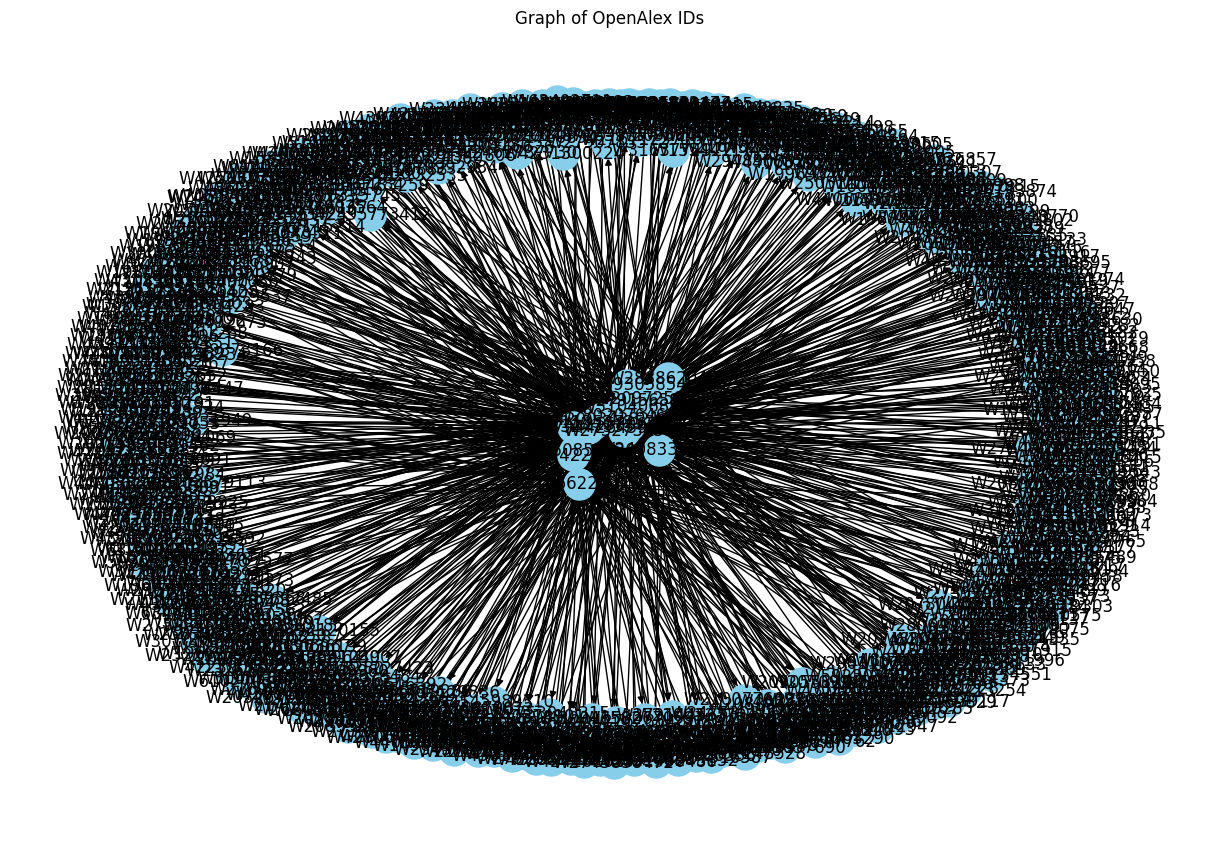

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

# take the two dictionaries and create a graph whose nodes are the dictionary keys and values. create an edge between nodes if the value is associated with a  key
# Create a directed graph
# Create a graph
G = nx.DiGraph()

# Add nodes and edges for referenced_by_dict
for key, values in referenced_by_dict.items():
    if not G.has_node(key):
        G.add_node(key)
    for value in values:
        if not G.has_node(value):
            G.add_node(value)
        G.add_edge(key, value)

# Add nodes and edges for cited_by_dict
for key, values in cited_by_dict.items():
    if not G.has_node(key):
        G.add_node(key)
    for value in values:
        if not G.has_node(value):
            G.add_node(value)
        G.add_edge(key, value)

# Plot the graph
plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=True, node_size=500, node_color="skyblue", pos=nx.spring_layout(G))
plt.title("Graph of OpenAlex IDs")
plt.show()


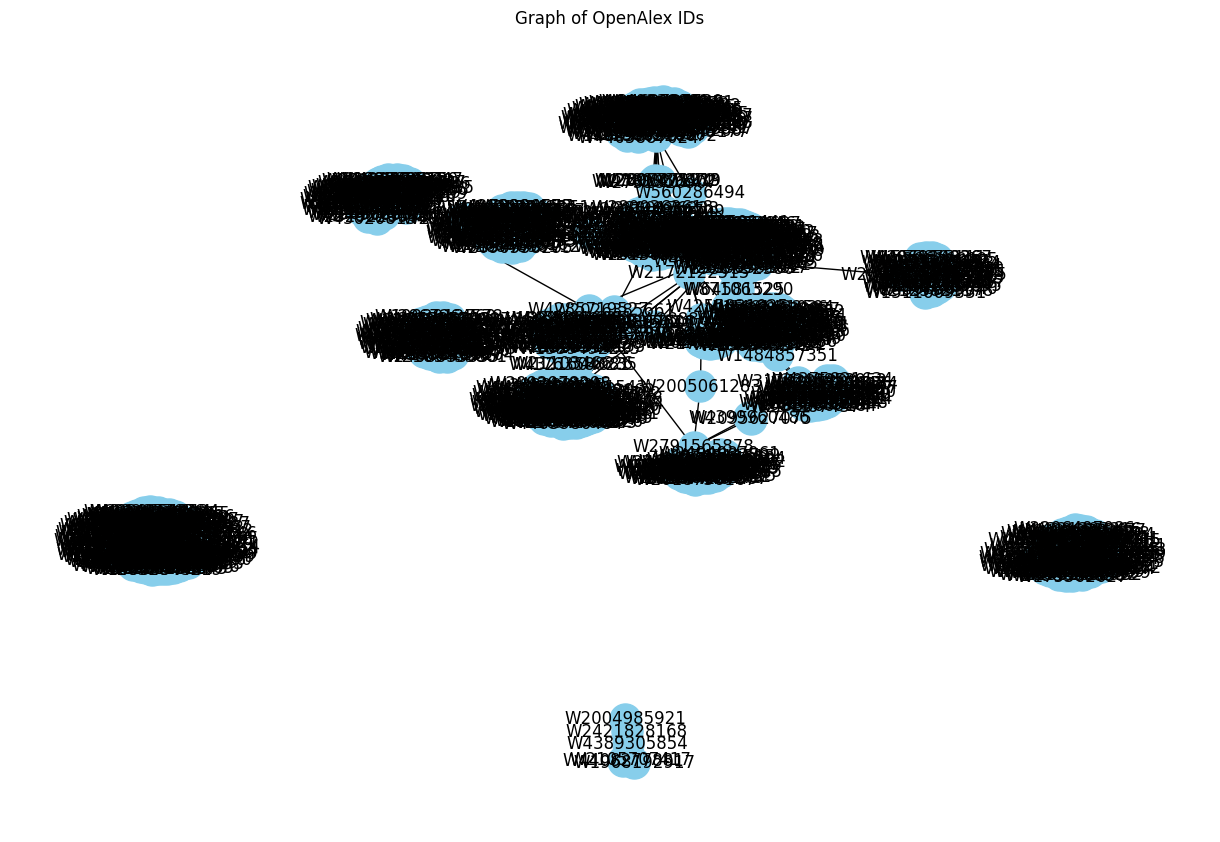

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

# take the two dictionaries and create a graph whose nodes are the dictionary keys and values. create an edge between nodes if the value is associated with a  key
# Create a directed graph
# Create a graph
G = nx.Graph()

# Add nodes and edges for referenced_by_dict
for key, values in referenced_by_dict.items():
    if not G.has_node(key):
        G.add_node(key)
    for value in values:
        if not G.has_node(value):
            G.add_node(value)
        G.add_edge(key, value)

# Add nodes and edges for cited_by_dict
for key, values in cited_by_dict.items():
    if not G.has_node(key):
        G.add_node(key)
    for value in values:
        if not G.has_node(value):
            G.add_node(value)
        G.add_edge(key, value)

# Plot the graph
plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=True, node_size=500, node_color="skyblue", pos=nx.spring_layout(G))
plt.title("Graph of OpenAlex IDs")
plt.show()


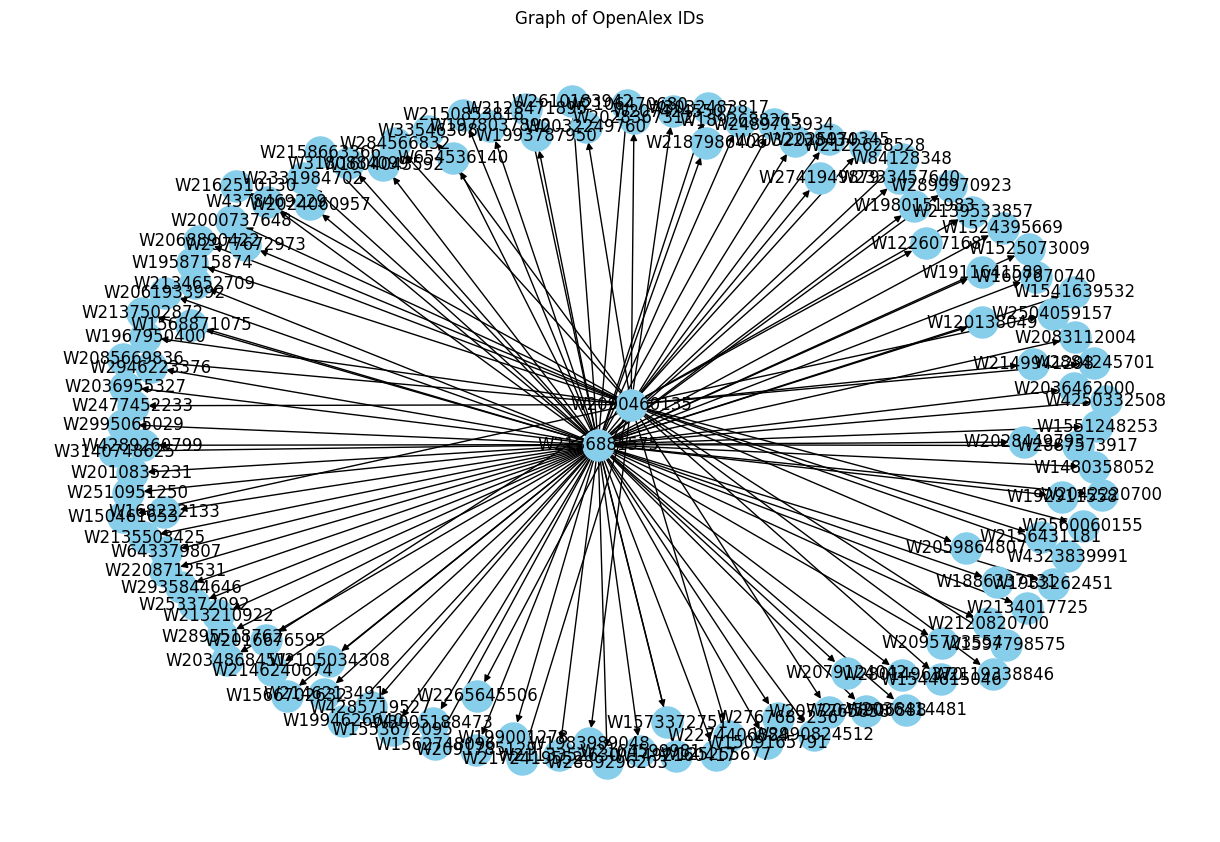

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

# take the two dictionaries and create a graph whose nodes are the dictionary keys and values. create an edge between nodes if the value is associated with a  key
# Create a directed graph
# Create a graph
H = nx.DiGraph()

# Add nodes and edges for referenced_by_dict
for key, values in test_referenced_by_dict.items():
    if not H.has_node(key):
        H.add_node(key)
    for value in values:
        if not H.has_node(value):
            H.add_node(value)
        H.add_edge(key, value)

# Add nodes and edges for cited_by_dict
for key, values in test_cited_by_dict.items():
    if not H.has_node(key):
        H.add_node(key)
    for value in values:
        if not H.has_node(value):
           H.add_node(value)
        H.add_edge(key, value)

# Plot the graph
plt.figure(figsize=(12, 8))
nx.draw(H, with_labels=True, node_size=500, node_color="skyblue", pos=nx.spring_layout(H))
plt.title("Graph of OpenAlex IDs")
plt.show()


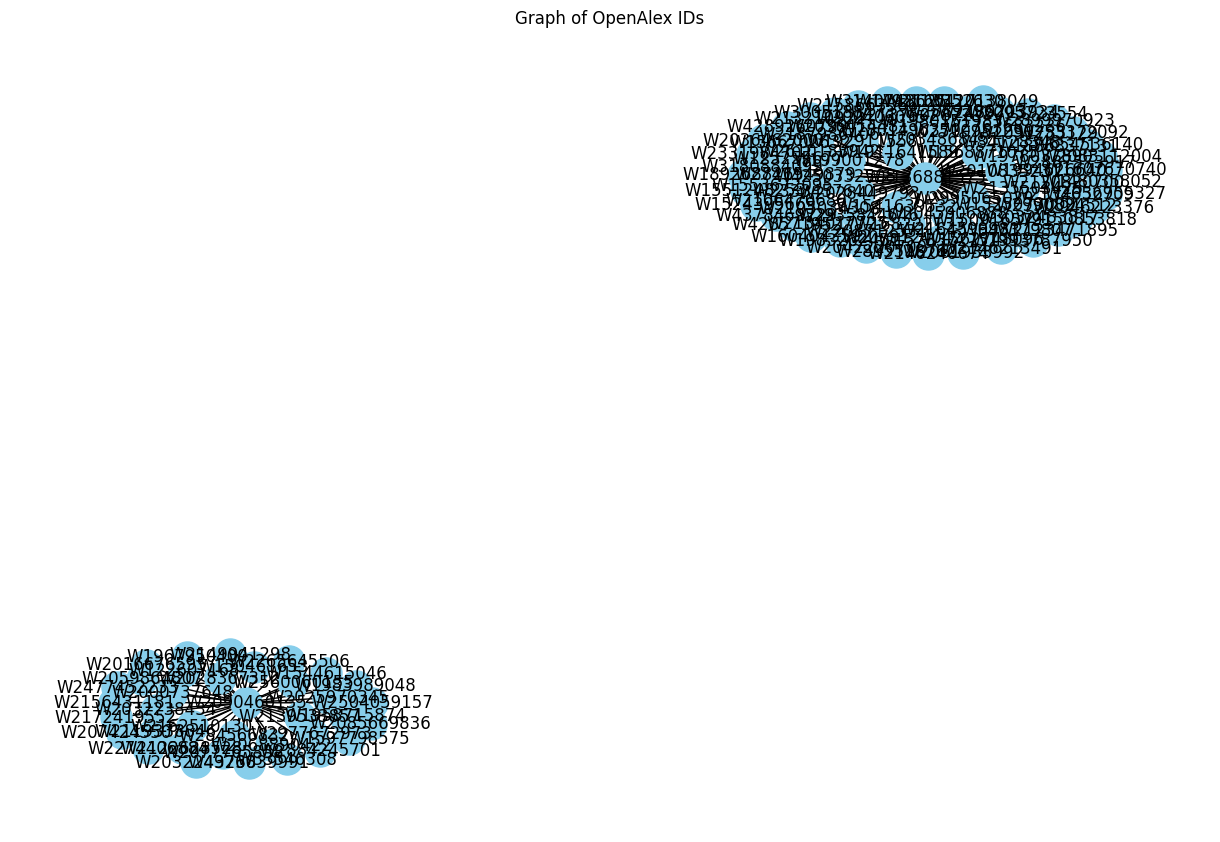

In [18]:
# Does it matter if the graph is directed or undirected?
import networkx as nx
import matplotlib.pyplot as plt

# take the two dictionaries and create a graph whose nodes are the dictionary keys and values. create an edge between nodes if the value is associated with a  key
# Create a directed graph
# Create a graph
H = nx.Graph()

# Add nodes and edges for referenced_by_dict
for key, values in test_referenced_by_dict.items():
    if not H.has_node(key):
        H.add_node(key)
    for value in values:
        if not H.has_node(value):
            H.add_node(value)
        H.add_edge(key, value)

# Add nodes and edges for cited_by_dict
for key, values in test_cited_by_dict.items():
    if not H.has_node(key):
        H.add_node(key)
    for value in values:
        if not H.has_node(value):
           H.add_node(value)
        H.add_edge(key, value)

# Plot the graph
plt.figure(figsize=(12, 8))
nx.draw(H, with_labels=True, node_size=500, node_color="skyblue", pos=nx.spring_layout(H))
plt.title("Graph of OpenAlex IDs")
plt.show()


In [19]:
# I want to make sure I understand the maths behind the graph so let's take as a case just the first reference in the excellent paper, which I happen to know well as a paper

referenced_by_ids = []
cited_by_ids = []

# Lookup information on openalex.org using pyalex library
work = Works('W2802076461').get()

# Extract 'referenced_by' OpenAlex IDs
if 'referenced_works' in work:
    referenced_by_ids.extend(work['referenced_works'])

# Extract 'cited_by_api_url' OpenAlex IDs
if 'cited_by_api_url' in work:
    cited_by_api_url = work['cited_by_api_url']
    response = requests.get(cited_by_api_url)
    if response.status_code == 200:
        cited_by_work = response.json()
        if 'results' in cited_by_work:
            cited_by_ids.extend([cited['id'] for cited in cited_by_work['results']])

# for every item in the lists remove the 'https://openalex.org/'
referenced_by_ids = [x.split('/')[-1] for x in referenced_by_ids]
cited_by_ids = [x.split('/')[-1] for x in cited_by_ids]

print("Referenced by:", len(referenced_by_ids))
print("Cited by:", len(cited_by_ids))

ref_ids={'W2802076461': referenced_by_ids}
cite_ids={'W2802076461': cited_by_ids}

ref_ids


Referenced by: 54
Cited by: 25


{'W2802076461': ['W1601400566',
  'W1602775671',
  'W175562627',
  'W1976345684',
  'W1985692482',
  'W1998119680',
  'W2003007843',
  'W2004439802',
  'W2017430530',
  'W2027046055',
  'W2028769438',
  'W2155346182',
  'W2164501533',
  'W2206497086',
  'W2319173765',
  'W2333736089',
  'W2545960929',
  'W2583082295',
  'W2798968830',
  'W2997052055',
  'W3146083582',
  'W4206675716',
  'W4206833477',
  'W4207017369',
  'W4210778009',
  'W4210913059',
  'W4214713697',
  'W4230653741',
  'W4231300224',
  'W4233394093',
  'W4233928894',
  'W4238630695',
  'W4239533721',
  'W4240497754',
  'W4241786887',
  'W4242053761',
  'W4243732951',
  'W4243761327',
  'W4243937523',
  'W4244036983',
  'W4244415112',
  'W4244791615',
  'W4247147451',
  'W4247676128',
  'W4248411996',
  'W4248436120',
  'W4248481358',
  'W4248624216',
  'W4250693973',
  'W4254274555',
  'W4254999364',
  'W4321383216',
  'W612270436',
  'W621751509']}

## Let's get these data structures out into a format the Vosviewer can use

In [20]:
import csv

referenced_by_dict.update(cited_by_dict)
test_referenced_by_dict.update(test_cited_by_dict)

def dict_to_csv(dictionary, filename):
    # Open the file in write mode
    with open(filename, 'w', newline='') as csvfile:
        # Create a csv writer object
        csvwriter = csv.writer(csvfile)
        
        # Iterate over each key-value pair in the dictionary
        for key, values in dictionary.items():
            # Write each key-value pair to the csv file
            for value in values:
                csvwriter.writerow([key, value])

# Example usage
'''sample_dict = {
    'openalex_id_1': ['ref_id_1', 'ref_id_2'],
    'openalex_id_2': ['ref_id_3', 'ref_id_4']
}'''



'''dict_to_csv(referenced_by_dict, 'ref_train.csv')
dict_to_csv(cited_by_dict, 'cited_train.csv')
dict_to_csv(test_referenced_by_dict, 'ref_test.csv')
dict_to_csv(test_cited_by_dict, 'cited_test.csv')'''

dict_to_csv(referenced_by_dict, 'excellent_train.csv')
dict_to_csv(test_referenced_by_dict, 'mediocre_train.csv')
dict_to_csv(ref_ids, 'braidotti_refs.csv')
dict_to_csv(cite_ids, 'braidotti_cites.csv')


In [ ]:
# It appears to be very important to me that I keep inspecting the data!

referenced_by_dict

## Exploring networkx methods
### Possibly altering slide 4 if new insights can be found

In [21]:
import networkx as nx
from networkx import density

# Create graphs from dictionaries
G = nx.Graph(referenced_by_dict)
H = nx.Graph(test_referenced_by_dict)
A = nx.Graph(ref_ids)
B = nx.Graph(cite_ids)

# Uncomment the following lines to visualize the graphs
# nx.draw(G, with_labels=True, node_size=500, node_color="skyblue", pos=nx.spring_layout(G))
# plt.title("Graph of OpenAlex IDs")
# nx.draw(H, with_labels=True, node_size=500, node_color="skyblue", pos=nx.spring_layout(H))
# plt.title("Graph of OpenAlex IDs")

# Get nodes and edges
G_nodes = list(G.nodes)
G_edges = list(G.edges)
H_nodes = list(H.nodes)
H_edges = list(H.edges)
A_nodes = list(A.nodes)
A_edges = list(A.edges)
B_nodes = list(B.nodes)
B_edges = list(B.edges)

# Print the number of nodes and edges
print(len(G_nodes))
print(len(G_edges))
print(len(H_nodes))
print(len(H_edges))
print(len(A_nodes))
print(len(A_edges))
print(len(B_nodes))
print(len(B_edges))

# Print densities
print('Density of excellent paper: ', density(G))
print('Density of average paper: ', density(H))
print('Ratio of densities excellent/average: ', density(H) / density(G))
print('Density of braidotti test paper refs: ', density(A))
#print('Density of braidotti test paper cites: ', density(B))

# Check for isomorphism
print('Are the student graphs isomorphic?', nx.is_isomorphic(G, H))
print('Are the student_excellent and braidotti_reference graphs isomorphic?', nx.is_isomorphic(G, A))
print('Testing isomorphism?', nx.is_isomorphic(A, A))



240
229
52
50
55
54
26
25
Density of excellent paper:  0.00798465829846583
Density of average paper:  0.03770739064856712
Ratio of densities excellent/average:  4.722480191270327
Density of braidotti test paper refs:  0.03636363636363636
Are the student graphs isomorphic? False
Are the student_excellent and braidotti_reference graphs isomorphic? False
Testing isomorphism? True


### Doing a lot of checking. CUrious result is that the better paper is less dense than average paper which appears to be very similar to published paper.

### Perhaps it is not density but another measure - let's try connectedness methods.